In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("C:\\Users\\bshik\\Downloads\\archive (7)\\Airbnb_India_Top_500 - Copy.csv")

In [30]:
df.head(5)

,address,isHostedBySuperhost,location/lat,location/lng,name,numberOfGuests,pricing/rate/amount,roomType,stars
0,"Manali, Himachal Pradesh, India",False,32.22330,77.18228,HighQ Manali / Deluxe Room,3,8946,Room in hotel,NaN
1,"Manali, Himachal Pradesh, India",False,32.22352,77.18152,Highq manali / 3 BHK Cottage,9,9124,Room in hotel,NaN
2,"Goa, India",False,15.50400,73.86600,Best view of the river from your terrace 04,4,9900,Private room in home,4.00
3,"Bhuntar, Himachal Pradesh, India",False,31.88656,77.14467,Shabashe,1,8684,Shared room in rental unit,NaN
4,"Jaipur, Rajasthan, India",False,26.85991,75.66909,Luxurious Independent Studio with Wifi & Kitchen,1,20690,Entire condo,4.75


In [31]:
df.shape

(500, 9)

In [32]:
df.info

<bound method DataFrame.info of                               address  isHostedBySuperhost  location/lat  \
0     Manali, Himachal Pradesh, India                False      32.22330   
1     Manali, Himachal Pradesh, India                False      32.22352   
2                          Goa, India                False      15.50400   
3    Bhuntar, Himachal Pradesh, India                False      31.88656   
4            Jaipur, Rajasthan, India                False      26.85991   
..                                ...                  ...           ...   
495       Nalambi, Maharashtra, India                 True      19.22775   
496      Sughandhagiry, Kerala, India                False      11.58006   
497  Chalnichhina, Uttarakhand, India                 True      29.55470   
498                        Goa, India                 True      15.59870   
499             Munnar, Kerala, India                False      10.15926   

     location/lng                                      

In [33]:
df.isnull().sum()

address                  0
isHostedBySuperhost      0
location/lat             0
location/lng             0
name                     0
numberOfGuests           0
pricing/rate/amount      0
roomType                 0
stars                  304
dtype: int64

In [34]:
df['stars'].fillna(0,inplace= True)

C:\Users\bshik\AppData\Local\Temp\ipykernel_23700\4132388841.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['stars'].fillna(0,inplace= True)


In [35]:
df[['city','state','country']]= df['address'].str.split(",",n=2,expand=True)

In [36]:
df.rename(columns= {"location/lat":"latitude","location/lng  ":"longitude","pricing/rate/amount":"amount","isHostedBySuperhost":"isSuperhost" }, inplace=True)

In [37]:
df.drop(columns='address',inplace=True)

In [38]:
df.isnull().sum()

isSuperhost        0
latitude           0
location/lng       0
name               0
numberOfGuests     0
amount             0
roomType           0
stars              0
city               0
state              1
country           23
dtype: int64

In [39]:
df.dropna(subset=['state'],inplace=True)

In [40]:
df.isnull().sum()

isSuperhost        0
latitude           0
location/lng       0
name               0
numberOfGuests     0
amount             0
roomType           0
stars              0
city               0
state              0
country           22
dtype: int64

In [41]:
df.shape

(499, 11)

In [42]:
df['country'].fillna('India',inplace=True)

C:\Users\bshik\AppData\Local\Temp\ipykernel_23700\1845194848.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('India',inplace=True)


In [43]:
df.isnull().sum()

isSuperhost       0
latitude          0
location/lng      0
name              0
numberOfGuests    0
amount            0
roomType          0
stars             0
city              0
state             0
country           0
dtype: int64

In [44]:
df.rename(columns={"location/lng":"longitude" },inplace=True)

In [45]:
df.info

<bound method DataFrame.info of      isSuperhost  latitude  longitude  \
0          False  32.22330   77.18228   
1          False  32.22352   77.18152   
2          False  15.50400   73.86600   
3          False  31.88656   77.14467   
4          False  26.85991   75.66909   
..           ...       ...        ...   
495         True  19.22775   73.21889   
496        False  11.58006   75.99667   
497         True  29.55470   79.80569   
498         True  15.59870   73.75698   
499        False  10.15926   77.17119   

                                                  name  numberOfGuests  \
0                           HighQ Manali / Deluxe Room               3   
1                         Highq manali / 3 BHK Cottage               9   
2          Best view of the river from your terrace 04               4   
3                                             Shabashe               1   
4     Luxurious Independent Studio with Wifi & Kitchen               1   
..                             

In [46]:
df['state'].unique()

array([' Himachal Pradesh', ' India', ' Rajasthan', ' Haryana', ' Goa',
       ' Maharashtra', ' Karnataka', ' Uttarakhand', ' Delhi', ' Kerala',
       ' Madhya Pradesh', ' Calangute', ' Punjab', ' Andhra Pradesh',
       ' Tamil Nadu', ' North Goa', ' Nasirabad ', ' West Bengal',
       ' Bihar', ' Andaman and Nicobar Islands', ' GA', ' Uttar Pradesh',
       ' Gujarat', ' MH', ' Jammu and Kashmir', ' Kodagu', ' TN', ' HR',
       ' Bardez North Goa', ' Chennai', ' Bardez', ' महाराष्ट्र', ' goa',
       ' KA', ' कर्नाटक', ' Karle', ' Uttrakhand', ' Telangana', ' HP'],
      dtype=object)

In [47]:
df['state']=df['state'].replace([' Goa',' North Goa',' GA',' Calangute',' Bardez North Goa', ' India',' Bardez',' goa'],'Goa')
df['state']= df['state'].replace([' Maharashtra',' महाराष्ट्र',' MH'],'Maharashtra')
df['state']= df['state'].replace([' KA', ' कर्नाटक',' Kodagu'],' Karnataka')
df['state']= df['state'].replace({' Karle':' Kerala',' Uttarakhand':' Uttrakhand', ' HR':' Haryana',' TN':' Tamil Nadu',' HP':' Himachal Pradesh'})



In [48]:
df['state'].unique()

array([' Himachal Pradesh', 'Goa', ' Rajasthan', ' Haryana',
       'Maharashtra', ' Karnataka', ' Uttrakhand', ' Delhi', ' Kerala',
       ' Madhya Pradesh', ' Punjab', ' Andhra Pradesh', ' Tamil Nadu',
       ' Nasirabad ', ' West Bengal', ' Bihar',
       ' Andaman and Nicobar Islands', ' Uttar Pradesh', ' Gujarat',
       ' Jammu and Kashmir', ' Chennai', ' Telangana'], dtype=object)

In [49]:
df['state'].nunique()

22

In [50]:
state_wise =df['state'].value_counts()
stat =pd.DataFrame({'state':state_wise.index,'Count':state_wise.values })

In [51]:
stat

,state,Count
0,Goa,181
1,Maharashtra,99
2,Rajasthan,38
3,Uttrakhand,33
4,Kerala,25
5,Himachal Pradesh,25
6,Delhi,22
7,Tamil Nadu,22
8,Karnataka,16
9,Haryana,15


In [52]:
numofroom = df['roomType'].value_counts()
statics= pd.DataFrame({'roomType':numofroom.index ,'Count':numofroom.values})

In [53]:
statics

,roomType,Count
0,Entire villa,219
1,Farm stay,58
2,Entire home,49
3,Entire bungalow,29
4,Room in hotel,19
5,Private room in resort,13
6,Room in boutique hotel,12
7,Private room in villa,11
8,Private room in bed and breakfast,9
9,Entire condo,8


In [54]:
df.columns

Index(['isSuperhost', 'latitude', 'longitude', 'name', 'numberOfGuests',
       'amount', 'roomType', 'stars', 'city', 'state', 'country'],
      dtype='object')

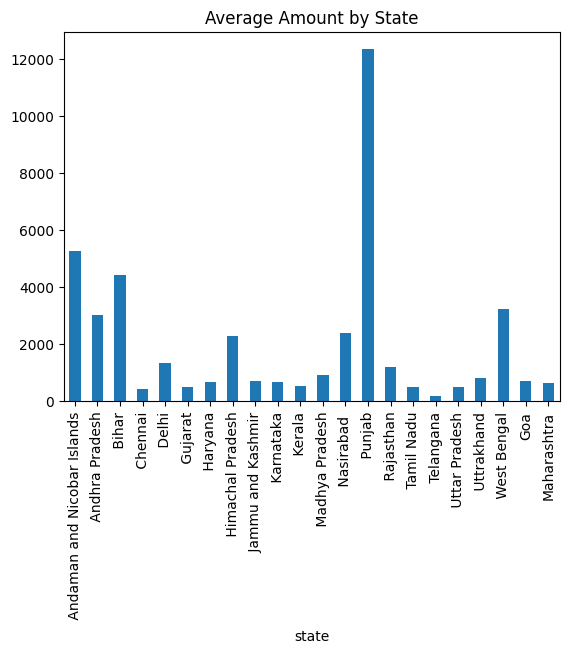

In [55]:
avg_price_state = df.groupby('state')['amount'].mean()
avg_price_state.plot(kind='bar', title='Average Amount by State')
plt.show()

In [56]:
Q1 = df['numberOfGuests'].quantile(0.25)
Q3 = df['numberOfGuests'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['numberOfGuests'] < lower_bound) | (df['numberOfGuests'] > upper_bound)]
print("Outliers:\n", outliers)

Outliers:
 Empty DataFrame
Columns: [isSuperhost, latitude, longitude, name, numberOfGuests, amount, roomType, stars, city, state, country]
Index: []


In [57]:
state_sum = df['state'].value_counts()
state_sum

state
Goa                             181
Maharashtra                      99
 Rajasthan                       38
 Uttrakhand                      33
 Kerala                          25
 Himachal Pradesh                25
 Delhi                           22
 Tamil Nadu                      22
 Karnataka                       16
 Haryana                         15
 Uttar Pradesh                    4
 Andhra Pradesh                   3
 Gujarat                          3
 Punjab                           3
 West Bengal                      2
 Madhya Pradesh                   2
 Nasirabad                        1
 Bihar                            1
 Andaman and Nicobar Islands      1
 Jammu and Kashmir                1
 Chennai                          1
 Telangana                        1
Name: count, dtype: int64

In [58]:
state_wise_rating = df[df['stars']!= 0].groupby('state')['stars'].mean()

In [59]:
state_wise_rating 

state
 Chennai             4.800000
 Delhi               4.760000
 Gujarat             4.620000
 Haryana             4.565000
 Himachal Pradesh    4.796000
 Karnataka           4.587143
 Kerala              4.717143
 Punjab              4.500000
 Rajasthan           4.578000
 Tamil Nadu          4.759000
 Telangana           5.000000
 Uttar Pradesh       4.785000
 Uttrakhand          4.677000
 West Bengal         4.435000
Goa                  4.665281
Maharashtra          4.589730
Name: stars, dtype: float64

Text(0.5, 1.0, 'State wise avg rating ')

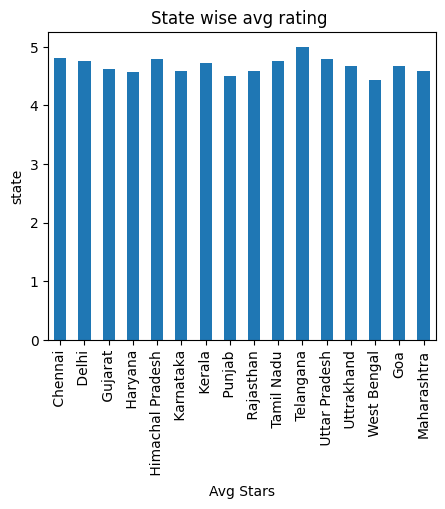

In [60]:
state_wise_rating = df[df['stars']!= 0].groupby('state')['stars'].mean()
state_wise_rating.plot(kind='bar',figsize=(5,4))
plt.xlabel("Avg Stars")
plt.ylabel("state")
plt.title("State wise avg rating ")

In [61]:
df['numberOfGuests'].isnull().sum()

np.int64(0)

In [62]:
#Convert no of guest to numeric
df['numberOfGuests'] =pd.to_numeric(df['numberOfGuests'],errors='coerce')

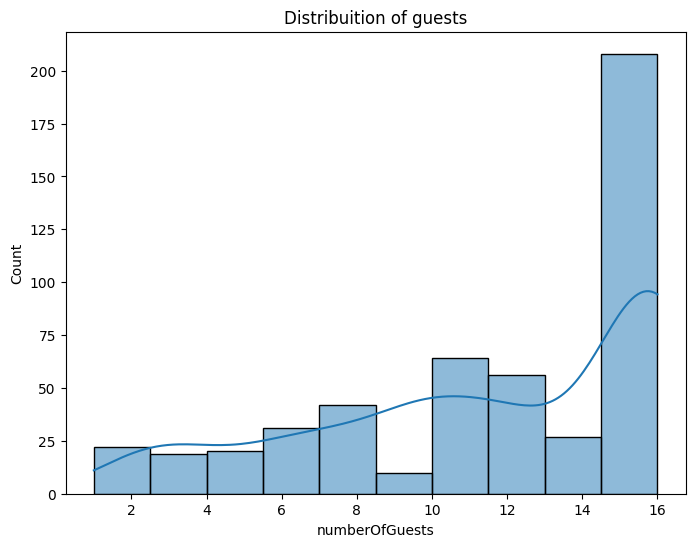

In [63]:
# histogram of 'numberOfGuests'
plt.figure(figsize=(8,6))
sns.histplot(df['numberOfGuests'],bins=10, kde=True)
plt.title('Distribuition of guests')
plt.show()

Text(0, 0.5, 'Price')

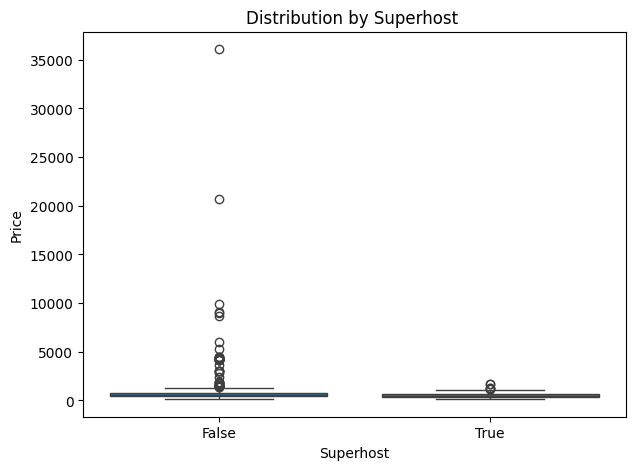

In [64]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df,x='isSuperhost',y='amount')
plt.title('Distribution by Superhost ')
plt.xlabel('Superhost')
plt.ylabel('Price')

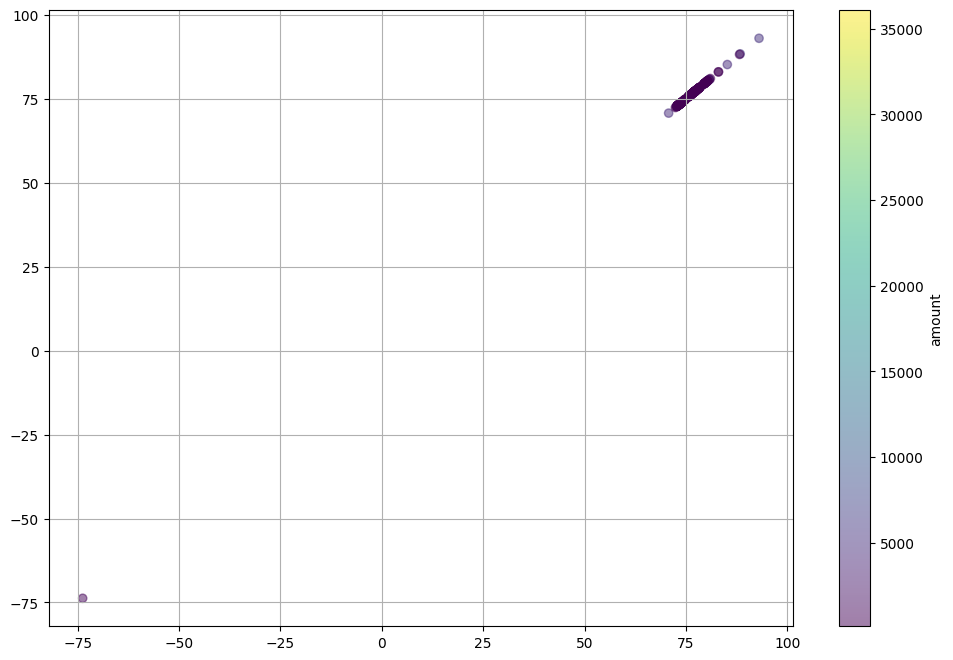

In [65]:
# avg price on based on location
plt.figure(figsize=(12,8))
plt.scatter(df['longitude'],df['longitude'],c=df['amount'],cmap='viridis',alpha=0.5)
plt.colorbar(label='amount')
plt.grid(True)
plt.show()

In [66]:
df.columns


Index(['isSuperhost', 'latitude', 'longitude', 'name', 'numberOfGuests',
       'amount', 'roomType', 'stars', 'city', 'state', 'country'],
      dtype='object')

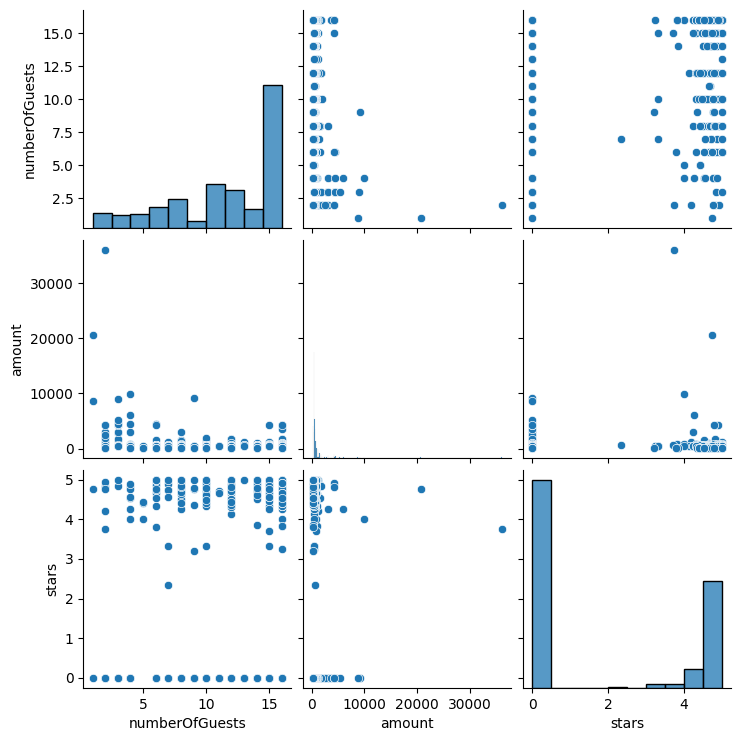

In [67]:
sns.pairplot(df[['numberOfGuests','amount','stars']])
plt.show()

In [68]:
correlation_matrix = df[['amount', 'numberOfGuests']].corr()
print(correlation_matrix)

                  amount  numberOfGuests
amount          1.000000       -0.238444
numberOfGuests -0.238444        1.000000


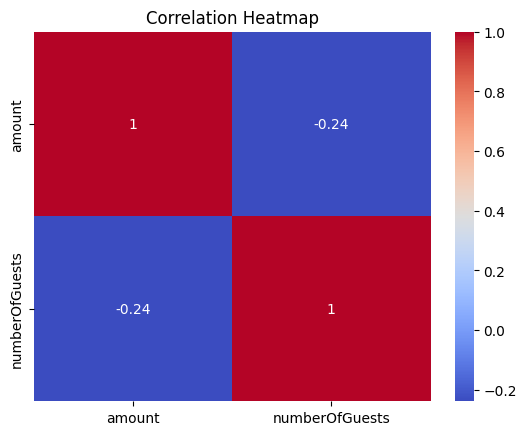

In [69]:
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()